<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Analisis_Trend_%26_Time_Series_(World_Dataset_Covid_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Unduh dan baca dataset OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, parse_dates=['date'])

# Filter untuk data Amerika Serikat
usa = df[df['location'] == 'United States'][['date', 'new_cases']]
usa = usa.dropna()
usa.set_index('date', inplace=True)
usa = usa[usa['new_cases'] >= 0]  # Hapus nilai negatif
usa.head()


,new_cases
date,
2020-01-05,0.0
2020-01-06,0.0
2020-01-07,0.0
2020-01-08,0.0
2020-01-09,0.0


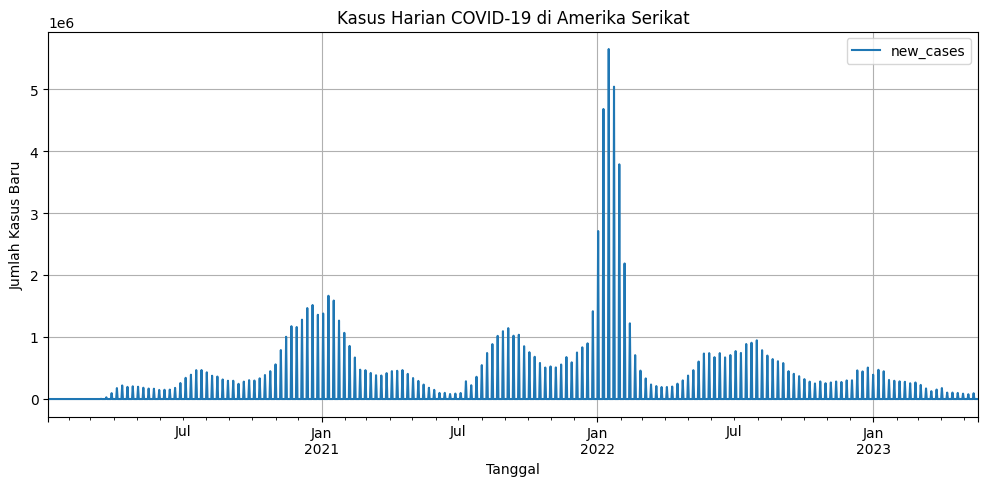

In [13]:
import matplotlib.pyplot as plt

usa.plot(title='Kasus Harian COVID-19 di Amerika Serikat', figsize=(12, 5))
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.grid(True)
plt.show()


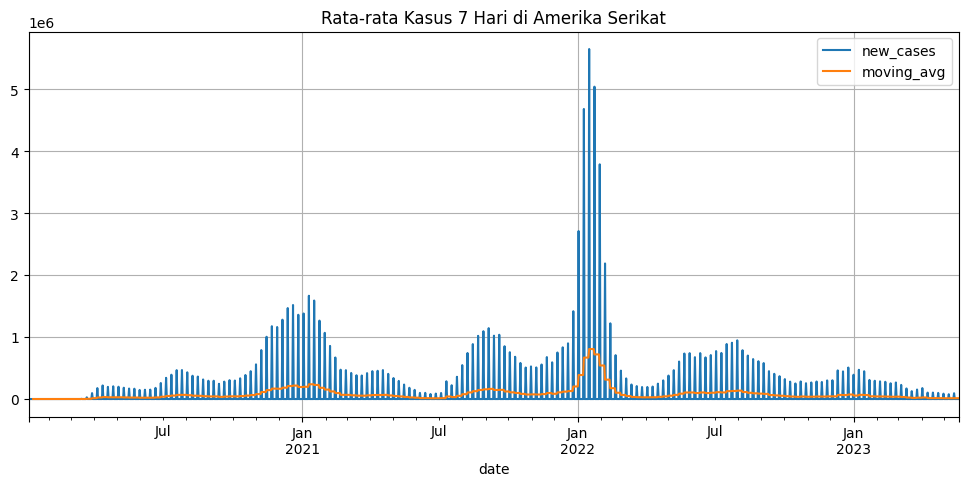

In [14]:
# Hitung rata-rata bergerak 7 hari
usa['moving_avg'] = usa['new_cases'].rolling(window=7).mean()

# Plot kasus baru dan moving average
usa[['new_cases', 'moving_avg']].plot(title='Rata-rata Kasus 7 Hari di Amerika Serikat', figsize=(12, 5))
plt.grid(True)
plt.show()


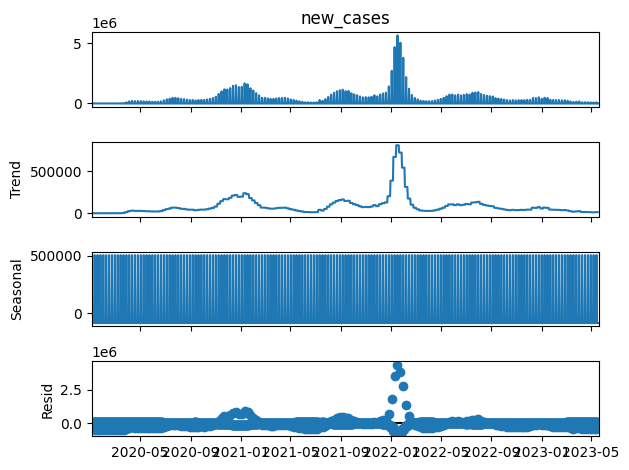

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Gunakan model aditif karena kasus harian memiliki fluktuasi linier
decomp = seasonal_decompose(usa['new_cases'], model='additive', period=7)
decomp.plot()
plt.show()
